In [1]:
from commons import *
from dataset_loader import load_dataset_with_cache
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

def load_and_test(dataset, aug, autoencoder, acache):
    autoencoder = original_autoencoder()
    data_set, train_set = load_dataset_with_cache(dataset, aug)
    print('%s: %d' % (dataset, len(train_set)))
    autoencoder = train_or_cache(train_set, autoencoder, '%s_%s' % (acache, dataset), validation_set=data_set)

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([data_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = "cache/%s_%s_vis_%s_%d_%s.png" % (dataset, acache, set_names, aug, df_name)
            hist_path = "cache/%s_%s_hist_%s_%d_%s.png" % (dataset, acache, set_names, aug, df_name)
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = "cache/%s_%s_vis_%s_%d_%s_full.png" % (dataset, acache, set_names, aug, df_name)
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)

In [2]:
autoencoder = original_autoencoder()
autoencoder.summary()

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60, 60, 1)]       0         
                                                                 
 encoder (Functional)        (None, 16)                249616    
                                                                 
 decoder (Functional)        (None, 60, 60, 1)         300865    
                                                                 
Total params: 550,481
Trainable params: 550,097
Non-trainable params: 384
_________________________________________________________________


320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
tracks: 39300
Epoch 1/200
1229/1229 [==============================] - 18s 12ms/step - loss: 0.0092 - val_loss: 3.5550e-04
Epoch 2/200
1229/1229 [==============================] - 14s 11ms/step - loss: 3.4803e-04 - val_loss: 3.1475e-04
Epoch 3/200
1229/1229 [==============================] - 14s 11ms/step - loss: 2.9796e-04 - val_loss: 2.4551e-04
Epoch 4/200
1229/1229 [==============================] - 14s 11ms/step - loss: 2.5360e-04 - val_loss: 2.1025e-04
Epoch 5/200
1229/1229 [==============================] - 14s 11ms/step - loss: 2.1379e-04 - val_loss: 7.3942e-04
Epoch 6/200
1229/1229 [==============================] - 13s 11ms/step - loss: 1.6583e-04 - val_loss: 3.2016e-04
Epoch 7/200
1229/1229 [==============================] - 13s 11ms/step - loss: 1.4848e-04 - val_loss: 0.0015
Epoch 8/200
1229/1229 [==============================] - 13s 11ms/step - loss: 1.2642e-04 - val_loss: 5.4528e-04
Epoch 9/200
1229/1229 

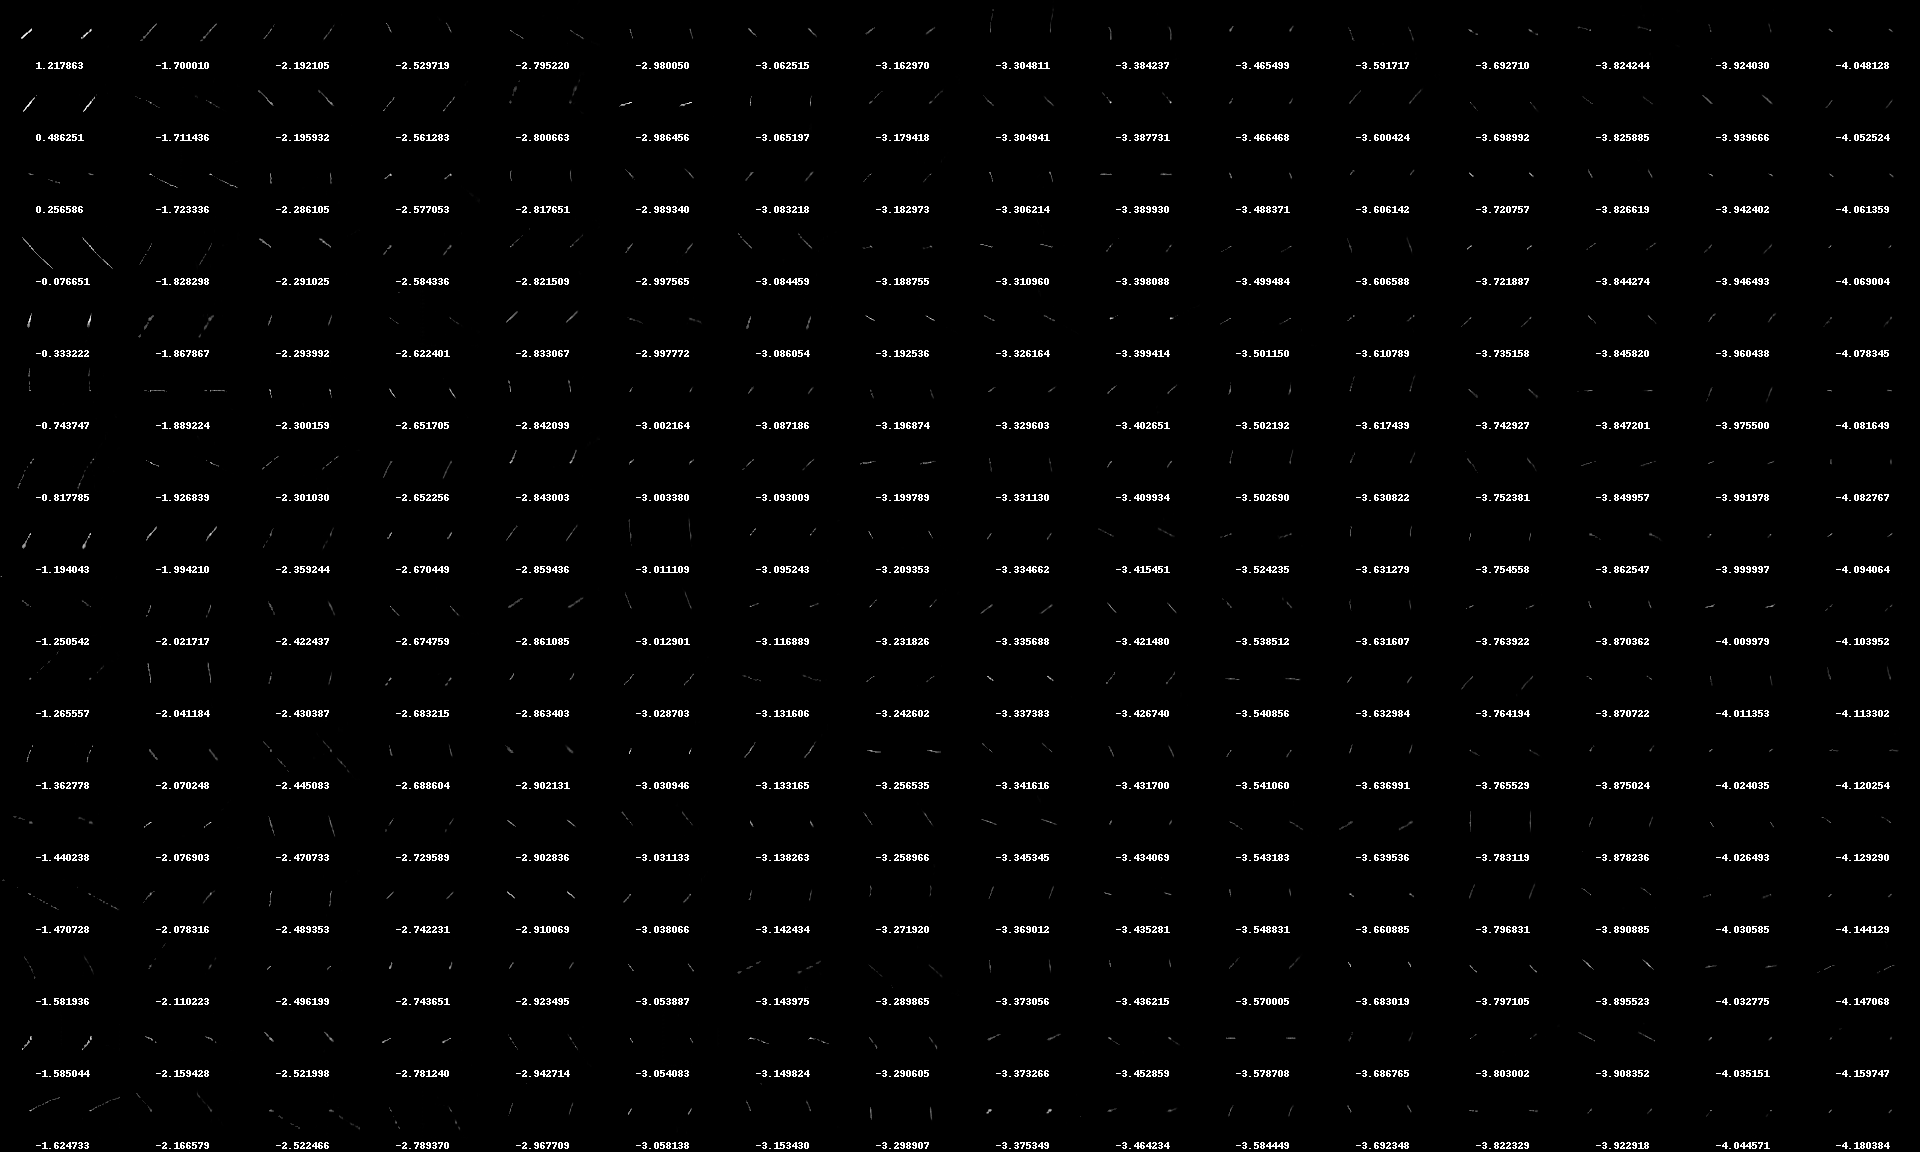

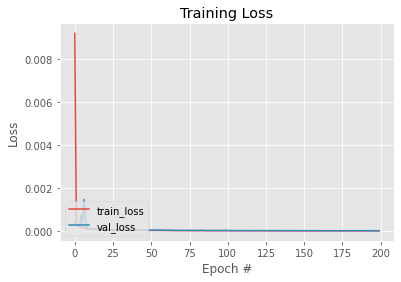

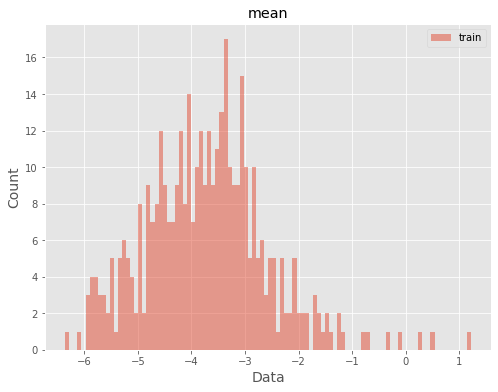

In [3]:
load_and_test('tracks', AUG, autoencoder, 'original')

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
worms: 30400
Epoch 1/200
950/950 [==============================] - 11s 10ms/step - loss: 0.0226 - val_loss: 0.0011
Epoch 2/200
950/950 [==============================] - 9s 10ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/200
950/950 [==============================] - 9s 10ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/200
950/950 [==============================] - 9s 10ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/200
950/950 [==============================] - 9s 10ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 6/200
950/950 [==============================] - 9s 10ms/step - loss: 0.0011 - val_loss: 9.0062e-04
Epoch 7/200
950/950 [==============================] - 9s 10ms/step - loss: 0.0010 - val_loss: 8.1847e-04
Epoch 8/200
950/950 [==============================] - 10s 10ms/step - loss: 9.0017e-04 - val_loss: 7.5112e-04
Epoch 9/200
950/950 [==============================] - 9s 10ms/step - loss: 8.8855e-0

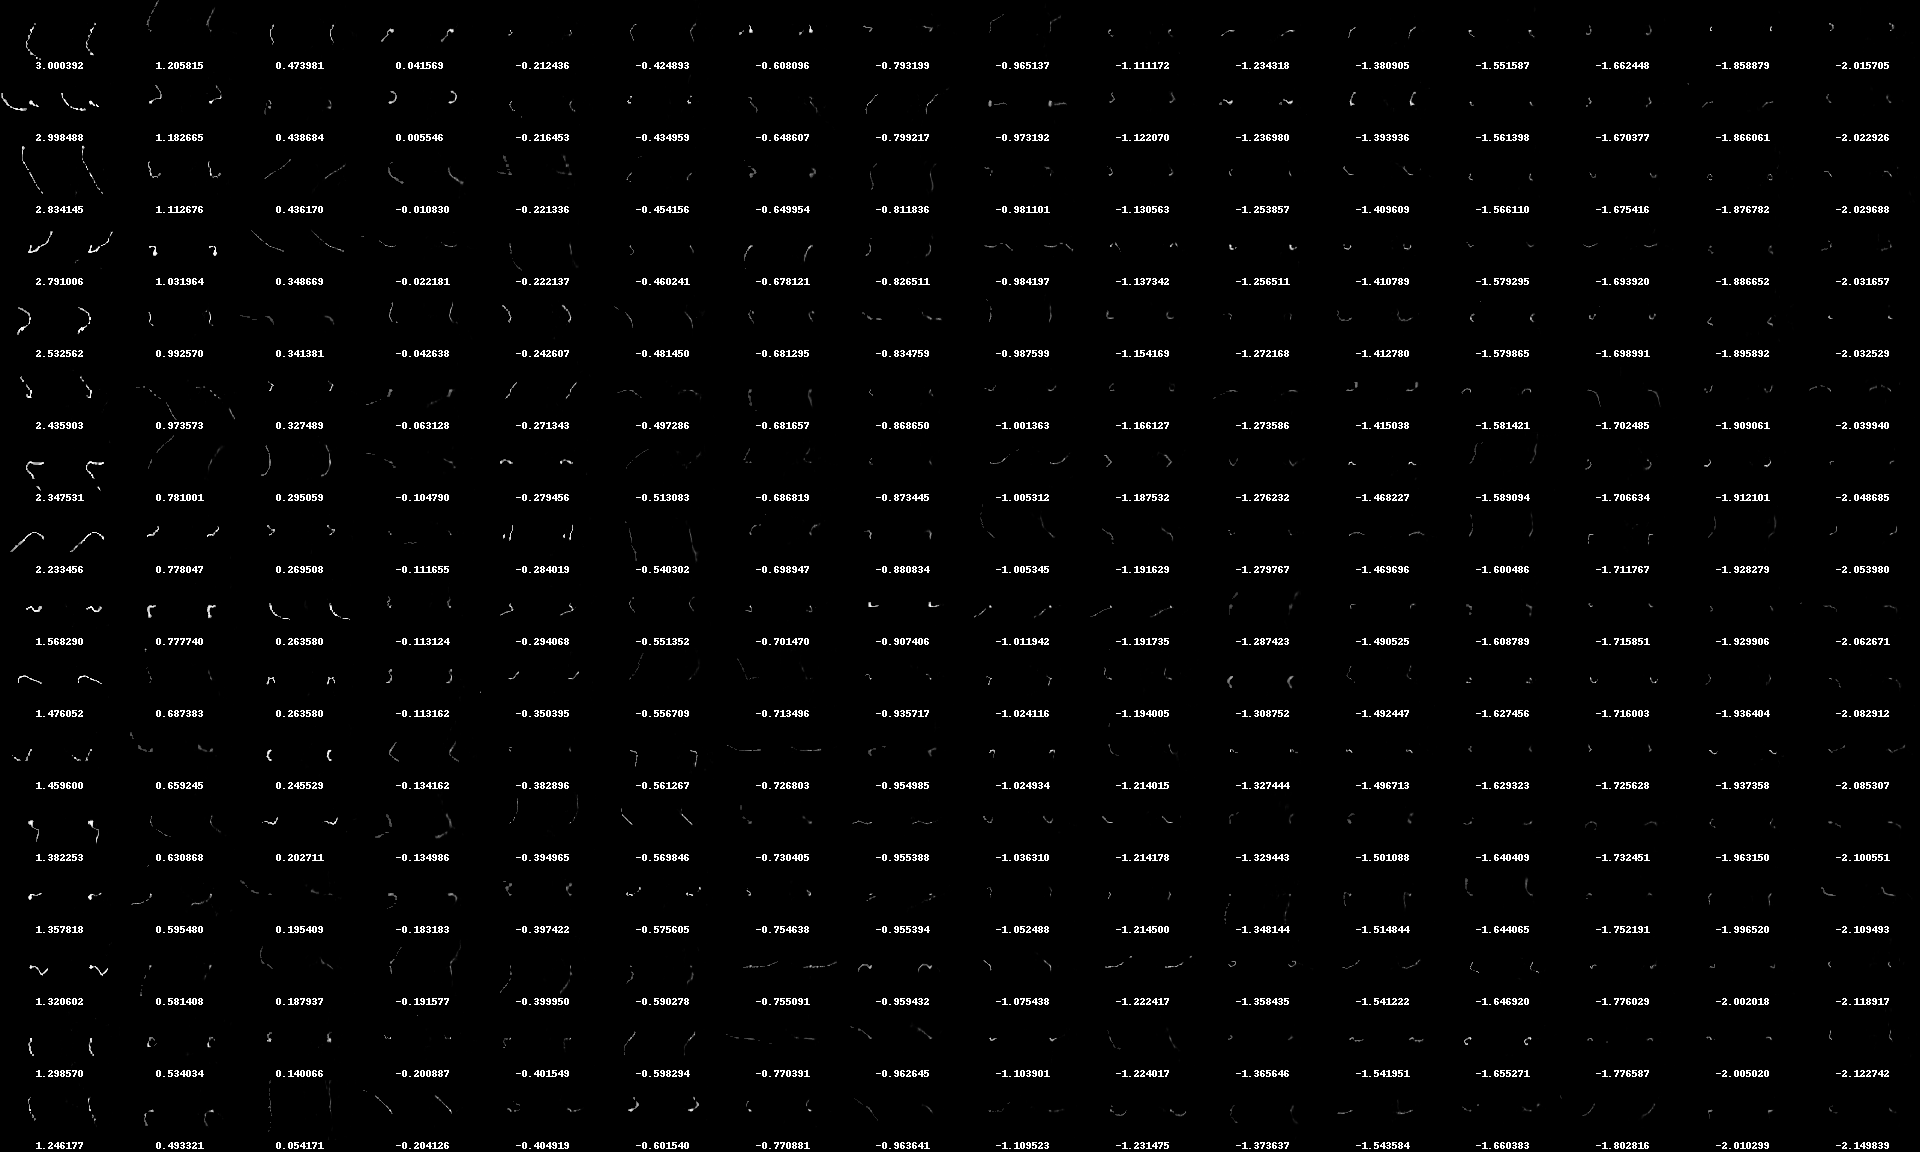

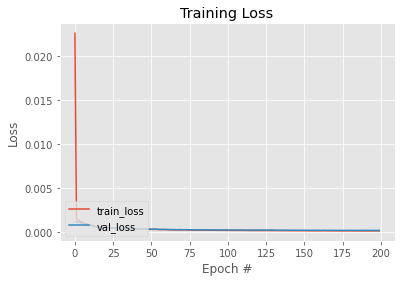

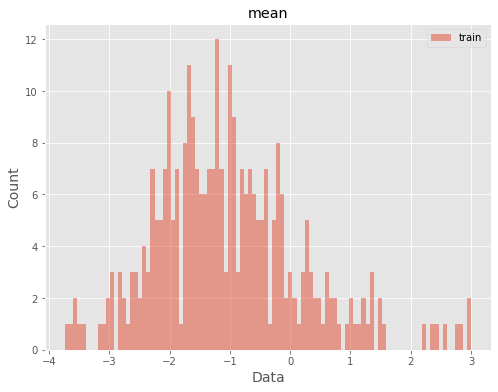

In [4]:
load_and_test('worms', AUG, autoencoder, 'original')

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
dots: 53500
Epoch 1/200
1672/1672 [==============================] - 19s 11ms/step - loss: 0.0323 - val_loss: 0.0289
Epoch 2/200
1672/1672 [==============================] - 18s 11ms/step - loss: 0.0288 - val_loss: 0.0140
Epoch 3/200
1672/1672 [==============================] - 18s 11ms/step - loss: 8.5561e-05 - val_loss: 2.9198e-05
Epoch 4/200
1672/1672 [==============================] - 18s 11ms/step - loss: 2.6178e-05 - val_loss: 2.8262e-05
Epoch 5/200
1672/1672 [==============================] - 18s 10ms/step - loss: 2.7108e-05 - val_loss: 5.6210e-05
Epoch 6/200
1672/1672 [==============================] - 18s 11ms/step - loss: 1.9120e-05 - val_loss: 1.9711e-05
Epoch 7/200
1672/1672 [==============================] - 18s 11ms/step - loss: 1.5358e-05 - val_loss: 2.7361e-05
Epoch 8/200
1672/1672 [==============================] - 18s 11ms/step - loss: 1.2845e-05 - val_loss: 1.1572e-05
Epoch 9/200
1672/1672 [=========

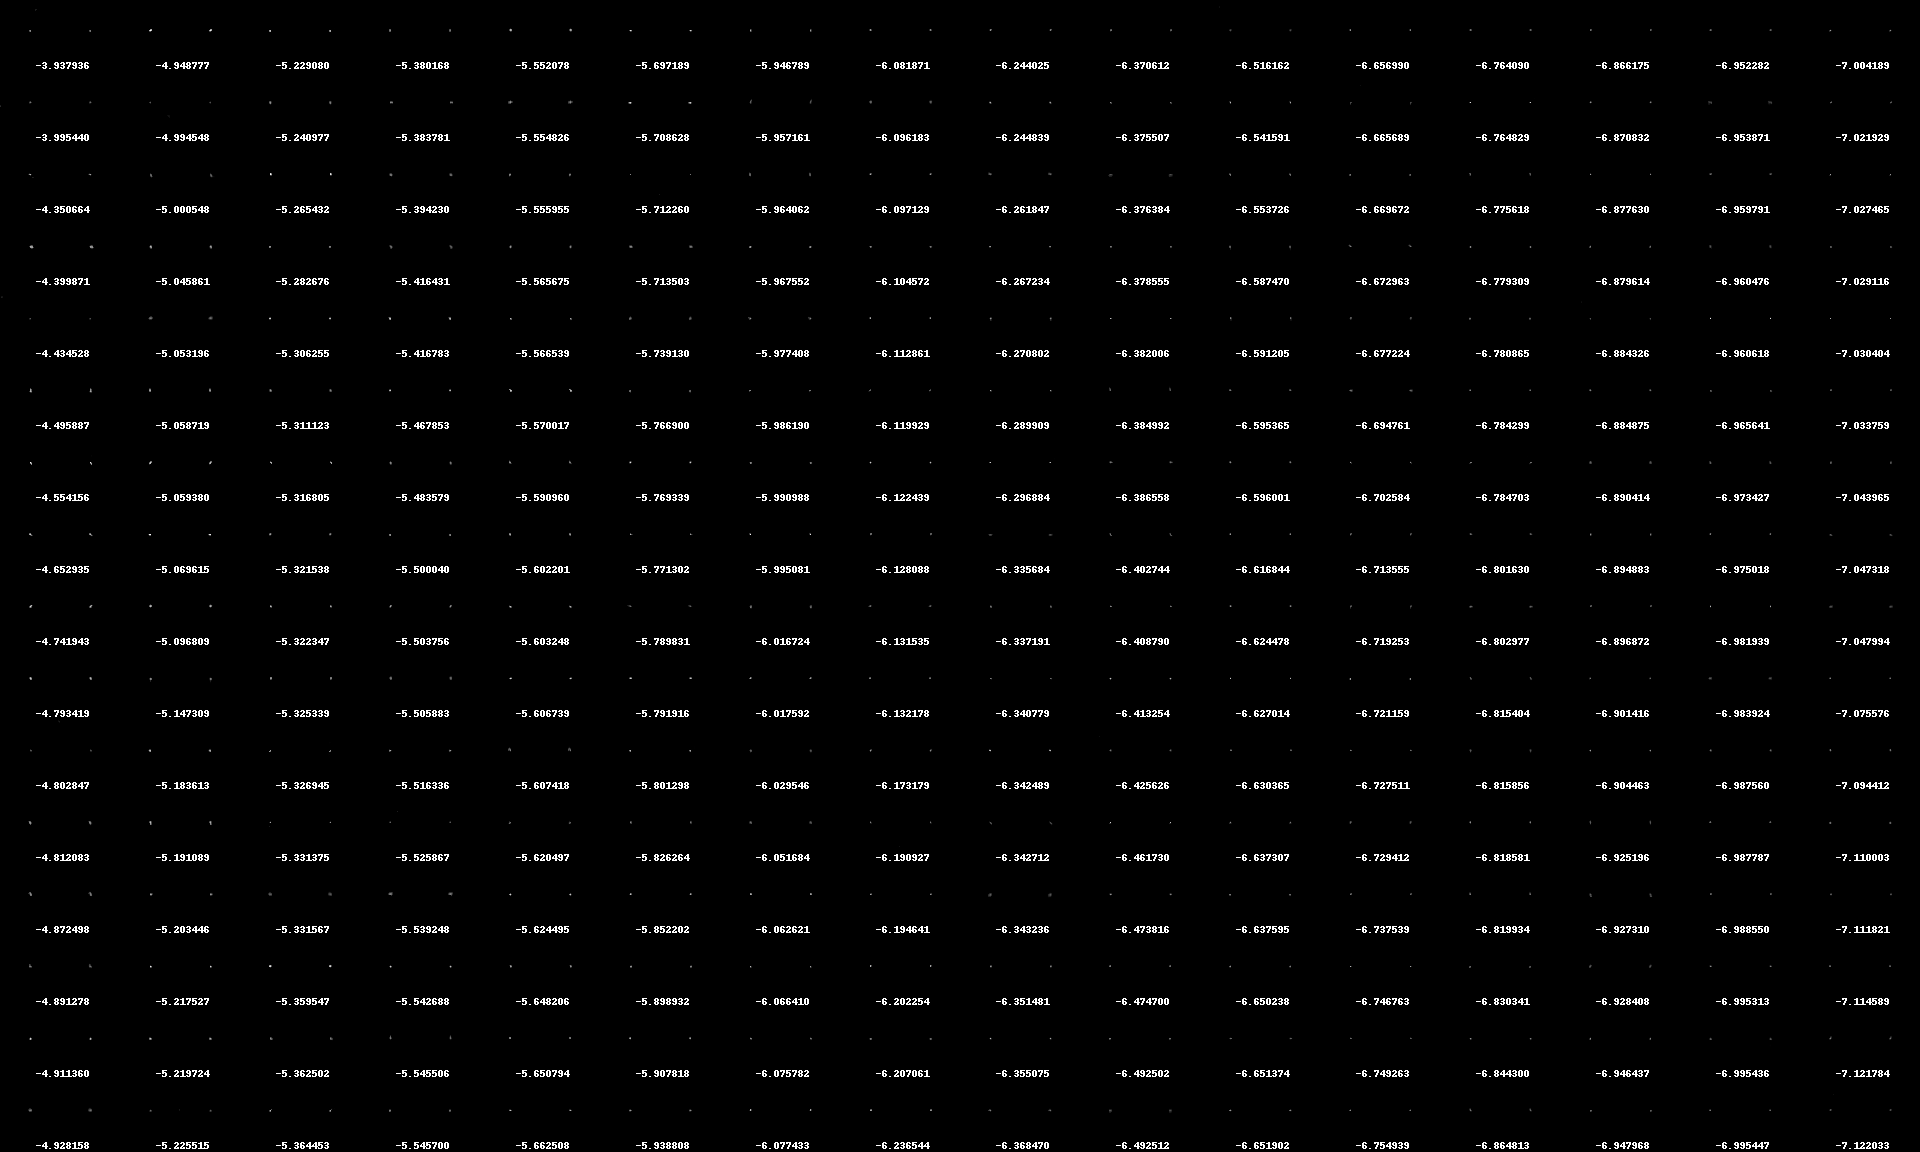

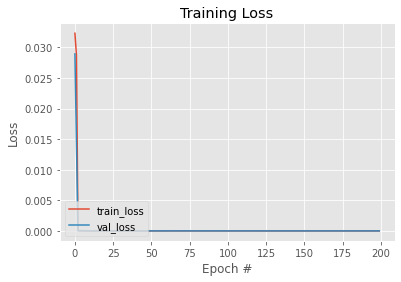

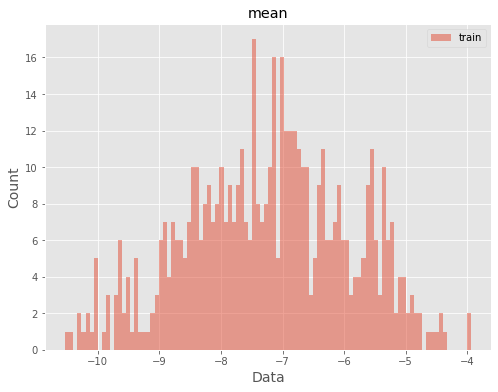

In [5]:
load_and_test('dots', AUG, autoencoder, 'original')

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
artifacts: 112200
Epoch 1/200
3507/3507 [==============================] - 39s 11ms/step - loss: 0.0187 - val_loss: 0.0145
Epoch 2/200
3507/3507 [==============================] - 39s 11ms/step - loss: 0.0102 - val_loss: 0.0096
Epoch 3/200
3507/3507 [==============================] - 38s 11ms/step - loss: 0.0067 - val_loss: 0.0101
Epoch 4/200
3507/3507 [==============================] - 39s 11ms/step - loss: 0.0055 - val_loss: 0.0075
Epoch 5/200
3507/3507 [==============================] - 38s 11ms/step - loss: 0.0050 - val_loss: 0.0063
Epoch 6/200
3507/3507 [==============================] - 39s 11ms/step - loss: 0.0044 - val_loss: 0.0061
Epoch 7/200
3507/3507 [==============================] - 39s 11ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 8/200
3507/3507 [==============================] - 39s 11ms/step - loss: 0.0038 - val_loss: 0.0052
Epoch 9/200
3507/3507 [==============================] - 38s 11ms/step - l

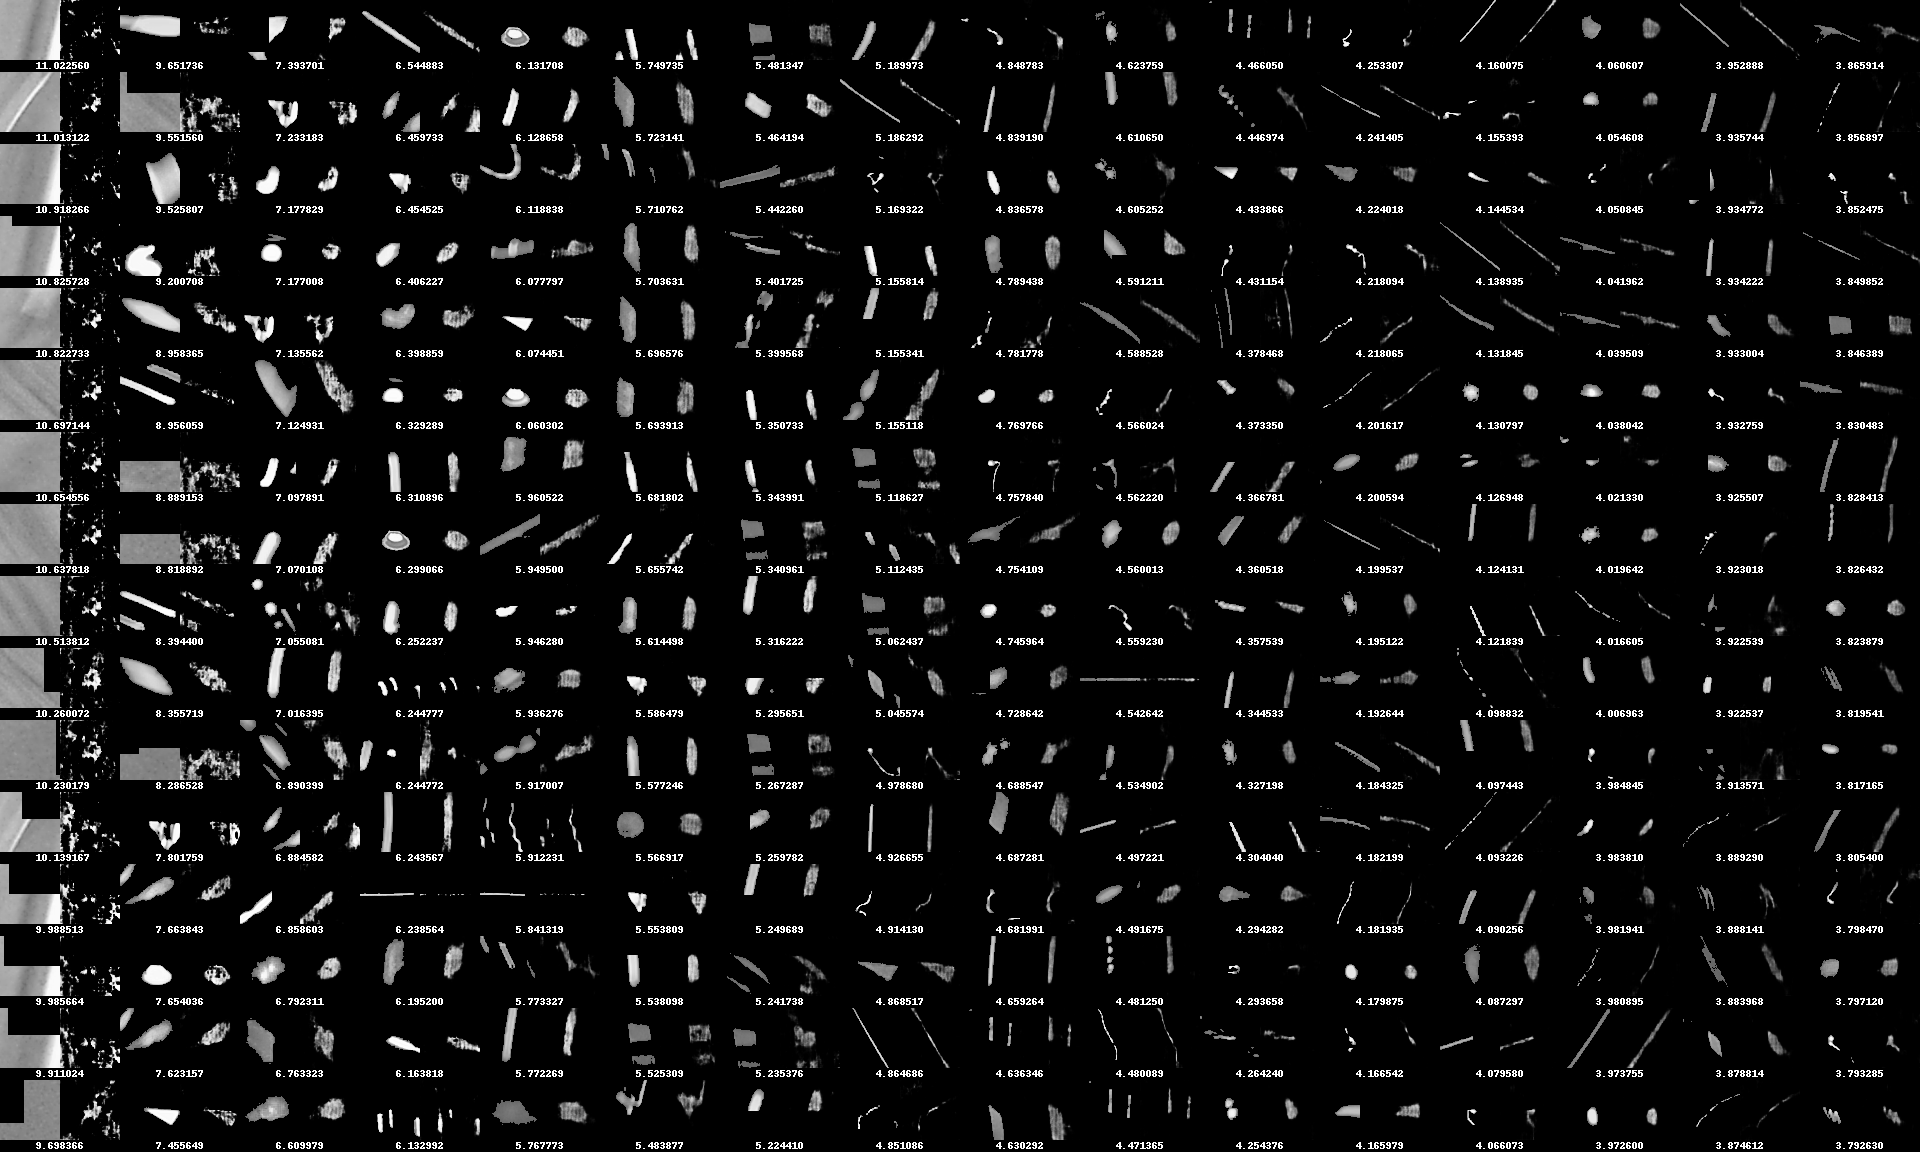

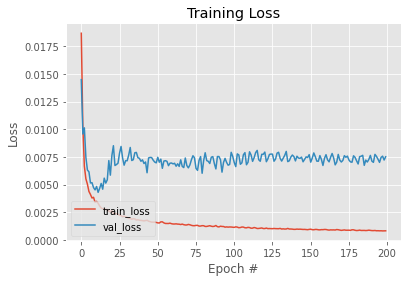

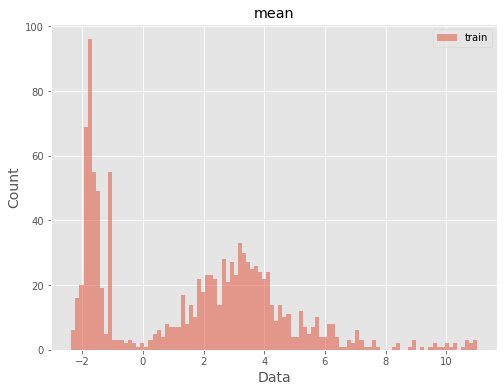

In [6]:
load_and_test('artifacts', AUG, autoencoder, 'original')